# Date Time Series

In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
# import sys
# np.set_printoptions(threshold=sys.maxsize)

csv_path = Path('data/temp.csv')
temp = pd.read_csv(csv_path, parse_dates=['datetime'])  # by this we can parse in datetype

In [9]:
temp.head()

,datetime,LA,NY
0,2013-01-01 00:00:00,11.7,-1.1
1,2013-01-01 01:00:00,10.7,-1.7
2,2013-01-01 02:00:00,9.9,-2.0
3,2013-01-01 03:00:00,9.3,-2.1
4,2013-01-01 04:00:00,8.8,-2.3


In [11]:
temp.info()  # we dont have datetime datatype actually

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  35064 non-null  datetime64[ns]
 1   LA        35062 non-null  float64       
 2   NY        35064 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 821.9 KB


In [14]:
temp.iloc[0, 0]

Timestamp('2013-01-01 00:00:00')

In [18]:
type(temp.iloc[0, 0])  # timestamp is a pandas data type to store date information

pandas._libs.tslibs.timestamps.Timestamp

In [22]:
# we can assign our timestamp column as index column... read above
temp = pd.read_csv(csv_path, parse_dates=['datetime'], index_col='datetime') 

In [28]:
temp.info()  # look at datetimeindex

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      35062 non-null  float64
 1   NY      35064 non-null  float64
dtypes: float64(2)
memory usage: 821.8 KB


In [30]:
temp.index  # datetime is a collection of many time stamps

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 01:00:00',
               '2013-01-01 02:00:00', '2013-01-01 03:00:00',
               '2013-01-01 04:00:00', '2013-01-01 05:00:00',
               '2013-01-01 06:00:00', '2013-01-01 07:00:00',
               '2013-01-01 08:00:00', '2013-01-01 09:00:00',
               ...
               '2016-12-31 14:00:00', '2016-12-31 15:00:00',
               '2016-12-31 16:00:00', '2016-12-31 17:00:00',
               '2016-12-31 18:00:00', '2016-12-31 19:00:00',
               '2016-12-31 20:00:00', '2016-12-31 21:00:00',
               '2016-12-31 22:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=35064, freq=None)

In [32]:
temp.index[0]

Timestamp('2013-01-01 00:00:00')

# Converting str to datetime objects

In [39]:
temp.datetime

0       2013-01-01 00:00:00
1       2013-01-01 01:00:00
2       2013-01-01 02:00:00
3       2013-01-01 03:00:00
4       2013-01-01 04:00:00
                ...        
35059   2016-12-31 19:00:00
35060   2016-12-31 20:00:00
35061   2016-12-31 21:00:00
35062   2016-12-31 22:00:00
35063   2016-12-31 23:00:00
Name: datetime, Length: 35064, dtype: datetime64[ns]

In [41]:
pd.to_datetime(temp.datetime)

0       2013-01-01 00:00:00
1       2013-01-01 01:00:00
2       2013-01-01 02:00:00
3       2013-01-01 03:00:00
4       2013-01-01 04:00:00
                ...        
35059   2016-12-31 19:00:00
35060   2016-12-31 20:00:00
35061   2016-12-31 21:00:00
35062   2016-12-31 22:00:00
35063   2016-12-31 23:00:00
Name: datetime, Length: 35064, dtype: datetime64[ns]

In [45]:
temp = temp.set_index(pd.to_datetime(temp.datetime)).drop('datetime', axis=1)

In [47]:
temp.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [49]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      35062 non-null  float64
 1   NY      35064 non-null  float64
dtypes: float64(2)
memory usage: 821.8 KB


In [51]:
temp.index

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 01:00:00',
               '2013-01-01 02:00:00', '2013-01-01 03:00:00',
               '2013-01-01 04:00:00', '2013-01-01 05:00:00',
               '2013-01-01 06:00:00', '2013-01-01 07:00:00',
               '2013-01-01 08:00:00', '2013-01-01 09:00:00',
               ...
               '2016-12-31 14:00:00', '2016-12-31 15:00:00',
               '2016-12-31 16:00:00', '2016-12-31 17:00:00',
               '2016-12-31 18:00:00', '2016-12-31 19:00:00',
               '2016-12-31 20:00:00', '2016-12-31 21:00:00',
               '2016-12-31 22:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=35064, freq=None)

In [67]:
pd.to_datetime('2015-05-20')  # keep in minde, it is year:month:day
pd.to_datetime('20150520') # this still works

Timestamp('2015-05-20 00:00:00')

In [57]:
pd.to_datetime('2015 20th may')

Timestamp('2015-05-20 00:00:00')

In [59]:
pd.to_datetime(['2020-02-02', '2024-02-02'])

DatetimeIndex(['2020-02-02', '2024-02-02'], dtype='datetime64[ns]', freq=None)

In [65]:
pd.to_datetime(['2020-02-02', '2024-02-02', 'elephant'], errors='coerce')

DatetimeIndex(['2020-02-02', '2024-02-02', 'NaT'], dtype='datetime64[ns]', freq=None)

In [75]:
temp.describe()

,LA,NY
count,35062.000000,35064.000000
mean,17.486016,12.068269
std,6.640666,10.466832
min,-6.600000,-22.400000
25%,12.900000,3.900000
50%,17.200000,12.500000
75%,21.900000,20.600000
max,42.300000,37.100000


array([[<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>]],
      dtype=object)

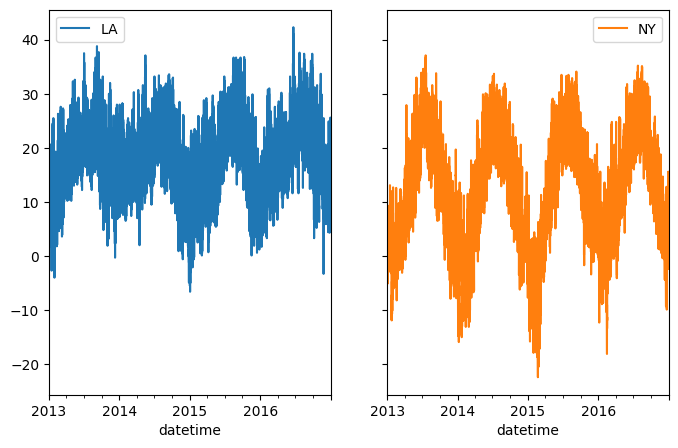

In [87]:
# temp.LA.value_counts()
temp.plot(figsize=(8, 5), subplots=True, layout=(1, 2), sharey=True)

In [91]:
temp = pd.read_csv(csv_path, parse_dates=['datetime'], index_col='datetime')

In [93]:
temp.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [101]:
temp.loc['2013-01-01 01:00:00']

LA    10.7
NY    -1.7
Name: 2013-01-01 01:00:00, dtype: float64

In [103]:
temp.loc['2015']

,LA,NY
datetime,,
2015-01-01 00:00:00,3.8,-5.1
2015-01-01 01:00:00,4.4,-5.1
2015-01-01 02:00:00,3.2,-6.0
2015-01-01 03:00:00,1.2,-6.0
2015-01-01 04:00:00,0.2,-6.0
...,...,...
2015-12-31 19:00:00,16.0,8.1
2015-12-31 20:00:00,16.0,8.1
2015-12-31 21:00:00,16.4,7.9


In [125]:
temp.loc['2015-05'].head(4)

,LA,NY
datetime,,
2015-05-01 00:00:00,25.5,13.9
2015-05-01 01:00:00,25.7,13.9
2015-05-01 02:00:00,23.8,10.5
2015-05-01 03:00:00,22.0,10.2


In [121]:
temp.loc['2015-05-20'].head(4)

,LA,NY
datetime,,
2015-05-20 00:00:00,17.7,19.8
2015-05-20 01:00:00,18.0,19.7
2015-05-20 02:00:00,16.6,19.0
2015-05-20 03:00:00,14.4,19.0


In [111]:
two_days = pd.to_datetime(['2015-05-20 10:00:00', '2015-05-20 12:00:00'])
two_days

DatetimeIndex(['2015-05-20 10:00:00', '2015-05-20 12:00:00'], dtype='datetime64[ns]', freq=None)

In [113]:
temp.loc['2015-01-01' : '2015-12-31']

,LA,NY
datetime,,
2015-01-01 00:00:00,3.8,-5.1
2015-01-01 01:00:00,4.4,-5.1
2015-01-01 02:00:00,3.2,-6.0
2015-01-01 03:00:00,1.2,-6.0
2015-01-01 04:00:00,0.2,-6.0
...,...,...
2015-12-31 19:00:00,16.0,8.1
2015-12-31 20:00:00,16.0,8.1
2015-12-31 21:00:00,16.4,7.9


In [115]:
temp.loc['2015-01-01': '2015-12-31'].equals(temp.loc['2015'])

True

In [119]:
temp.loc['20FEBRUARY2015'].head(4)

,LA,NY
datetime,,
2015-02-20 00:00:00,16.4,-12.4
2015-02-20 01:00:00,17.5,-12.4
2015-02-20 02:00:00,14.6,-14.5
2015-02-20 03:00:00,13.9,-14.5


# DatetimeIndex with pd.date_range()

In [129]:
pd.date_range(start = '2015-07-01', end='2015-07-31')

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10', '2015-07-11', '2015-07-12',
               '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16',
               '2015-07-17', '2015-07-18', '2015-07-19', '2015-07-20',
               '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24',
               '2015-07-25', '2015-07-26', '2015-07-27', '2015-07-28',
               '2015-07-29', '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', freq='D')

In [189]:
spec_range = pd.date_range(start = '2015-07-01', end='2015-07-31')

In [187]:
# time frequencies
pd.date_range(start = '2015-07-01', end='2015-07-31', freq='B')
pd.date_range(start = '2015-07-01', periods=31, freq='D')
pd.date_range(end = '2015-07-01', periods=31, freq='D')
pd.date_range(start = '2015-07-01', periods=10, freq='B')
pd.date_range(start = '2015-07-01', periods=31, freq='W')
pd.date_range(start = '2015-07-01', periods=6, freq='M')
pd.date_range(start = '2015-07-01', periods=6, freq='h')
pd.date_range(start = '2015-07-01', periods=4, freq='Q')
pd.date_range(start = '2015-07-01', periods=6, freq='YE')
# learn about this aliases for freq="X", B for business days, w for weekly, check out web

C:\Users\khali\AppData\Local\Temp\ipykernel_18436\239713595.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range(start = '2015-07-01', periods=6, freq='M')
C:\Users\khali\AppData\Local\Temp\ipykernel_18436\239713595.py:9: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  pd.date_range(start = '2015-07-01', periods=4, freq='Q')


DatetimeIndex(['2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31',
               '2019-12-31', '2020-12-31'],
              dtype='datetime64[ns]', freq='YE-DEC')

In [191]:
temp.resample("D")  # this is to group dates by days

In [195]:
list(temp.resample('D'))[1][1].head(4)

,LA,NY
datetime,,
2013-01-02 00:00:00,13.2,2.6
2013-01-02 01:00:00,11.8,2.7
2013-01-02 02:00:00,10.5,2.9
2013-01-02 03:00:00,9.5,2.9


In [201]:
temp.resample('D').sum().head(4)

,LA,NY
datetime,,
2013-01-01,212.6,-9.7
2013-01-02,222.8,77.0
2013-01-03,247.3,-58.2
2013-01-04,276.3,-49.7


In [203]:
temp.resample('2h').first().head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 04:00:00,8.8,-2.3
2013-01-01 06:00:00,6.9,-3.2
2013-01-01 08:00:00,6.7,-3.0


In [207]:
temp.resample('W').mean().head(4)

,LA,NY
datetime,,
2013-01-06,10.214583,0.222917
2013-01-13,10.494048,4.245238
2013-01-20,11.119643,3.924405
2013-01-27,15.586905,-4.660714


In [213]:
temp.resample('W-Wed').mean().head(4)

,LA,NY
datetime,,
2013-01-02,9.070833,1.402083
2013-01-09,11.033333,1.033929
2013-01-16,8.870238,6.001190
2013-01-23,14.678571,1.010714


In [219]:
# Downsampling
data = {'Timestamp': ['2024-12-01 00:01', '2024-12-01 00:02', '2024-12-01 00:03',
                      '2024-12-02 00:01', '2024-12-02 00:02'],
        'Value': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set the 'Timestamp' column as the index
df.set_index('Timestamp', inplace=True)

# Downsample to daily frequency (sum values per day)
daily = df.resample('D').sum()

print(daily)

            Value
Timestamp        
2024-12-01     60
2024-12-02     90


# Linear Regression with scikit-learn

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
budget = np.array([5, 10, 17, 27, 35, 40, 42, 49, 54, 60])
revenue = np.array([2.6, 19., 23.8, 26.9, 41.1, 58.3, 40.3, 58.7, 74.1, 69.7])

In [243]:
df = pd.DataFrame(data = {"revenue":revenue, "budget":budget})
df

,revenue,budget
0,2.6,5
1,19.0,10
2,23.8,17
3,26.9,27
4,41.1,35
5,58.3,40
6,40.3,42
7,58.7,49
8,74.1,54
9,69.7,60


<Axes: xlabel='budget', ylabel='revenue'>

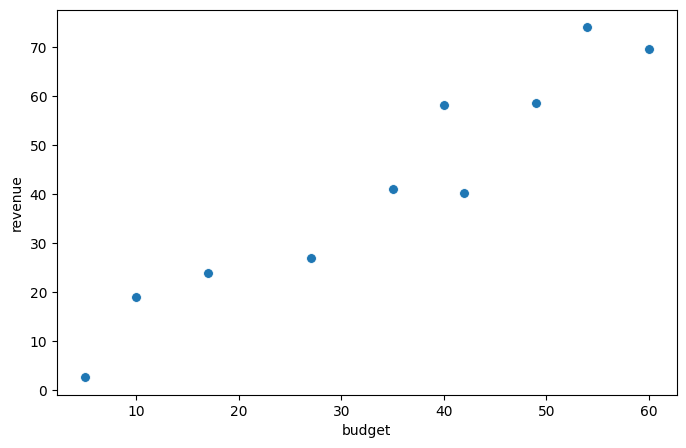

In [247]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df.budget, y=df.revenue, s = 50)

In [249]:
from sklearn.linear_model import LinearRegression

In [251]:
lm = LinearRegression(fit_intercept=True)
lm.fit(X=df.budget.to_frame(), y=df.revenue) # fitting the model (Regression Line)

LinearRegression()

In [257]:
slope = lm.coef_
slope

array([1.20534385])

In [260]:
intercept = lm.intercept_
intercept

0.5888434856980069

In [262]:
df['pred'] = lm.predict(df.budget.to_frame())
df

,revenue,budget,pred
0,2.6,5,6.615563
1,19.0,10,12.642282
2,23.8,17,21.079689
3,26.9,27,33.133127
4,41.1,35,42.775878
5,58.3,40,48.802597
6,40.3,42,51.213285
7,58.7,49,59.650692
8,74.1,54,65.677411
9,69.7,60,72.909474


In [276]:
x_lin = np.array([0, 100])
y_lin = intercept + slope * x_lin
y_lin

array([  0.58884349, 121.12322848])

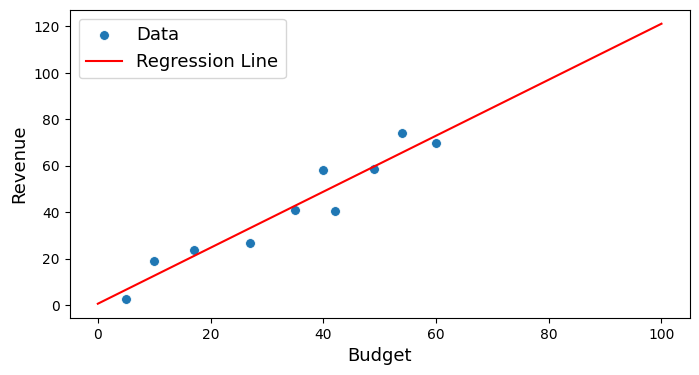

In [278]:
plt.figure(figsize = (8, 4))
sns.scatterplot(x = df.budget, y=df.revenue, s=50, label='Data')
plt.plot(x_lin, y_lin, c = 'red', label='Regression Line')
plt.xlabel('Budget', fontsize = 13)
plt.ylabel('Revenue', fontsize=13)
plt.legend(fontsize=13)

# Making Predictions with Linear Regression

In [285]:
budget_new = np.array([63, 66, 74, 80, 85])
revenue_new = np.array([74, 80, 98, 94, 101])

In [289]:
df_new = pd.DataFrame(data = {'revenue':revenue_new, 'budget':budget_new})
df_new.head(4)

,revenue,budget
0,74,63
1,80,66
2,98,74
3,94,80


In [291]:
df_new['pred'] = lm.predict(df_new.budget.to_frame())
df_new

,revenue,budget,pred
0,74,63,76.525506
1,80,66,80.141538
2,98,74,89.784288
3,94,80,97.016351
4,101,85,103.043071


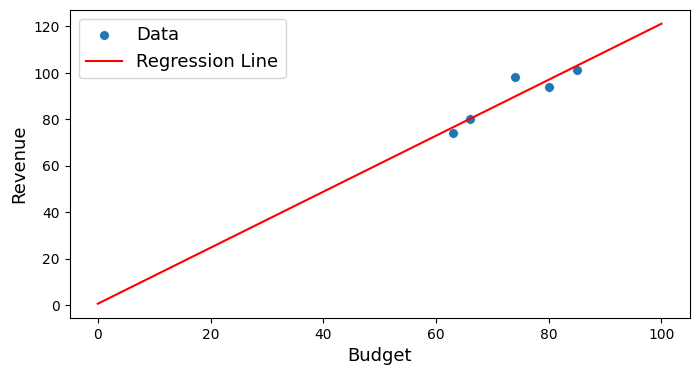

In [297]:
plt.figure(figsize = (8, 4))
sns.scatterplot(x = df_new.budget, y=df_new.revenue, s=50, label='Data')
plt.plot(x_lin, y_lin, c = 'red', label='Regression Line')
plt.xlabel('Budget', fontsize = 13)
plt.ylabel('Revenue', fontsize=13)
plt.legend(fontsize=13)

# Linear Regression

In [281]:
import pandas as pd
import numpy as np

# Sample DataFrame
data = {'x': [1, 2, 3, 4, 5],
        'y': [2.2, 4.1, 6.1, 8.3, 10.2]}
df = pd.DataFrame(data)

# Extract x and y as Pandas Series
x = df['x']
y = df['y']

# Calculate coefficients
n = len(x)
x_mean = x.mean()
y_mean = y.mean()

# Slope (m) and Intercept (b)
numerator = ((x - x_mean) * (y - y_mean)).sum()
denominator = ((x - x_mean) ** 2).sum()
m = numerator / denominator
b = y_mean - m * x_mean

print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")
# Predict y values
y_pred = m * x + b
# Display Results
print("Predicted y:", y_pred)

Slope (m): 2.02
Intercept (b): 0.11999999999999922
Predicted y: 0     2.14
1     4.16
2     6.18
3     8.20
4    10.22
Name: x, dtype: float64


# Arima

C:\Users\khali\AppData\Local\Temp\ipykernel_18436\2620344862.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2022-01-01', periods=100, freq='M'),


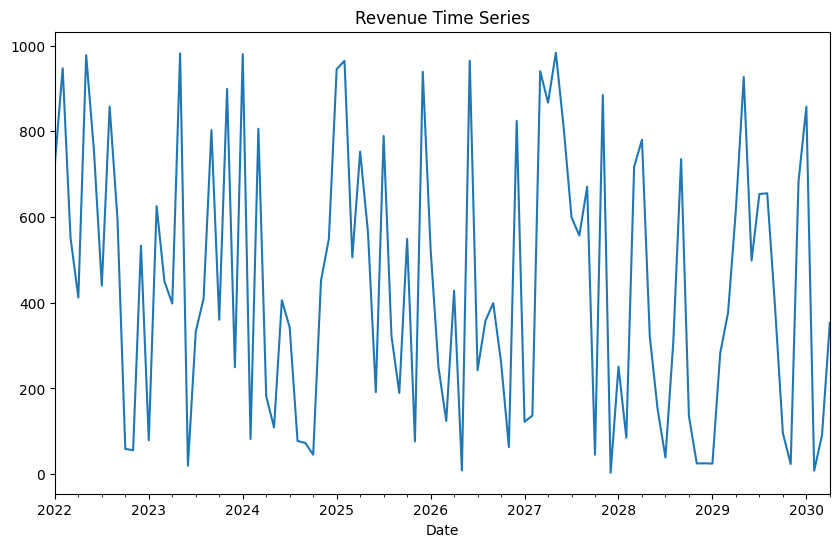

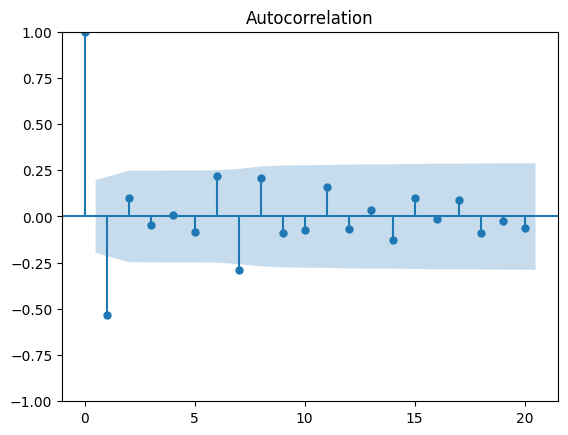

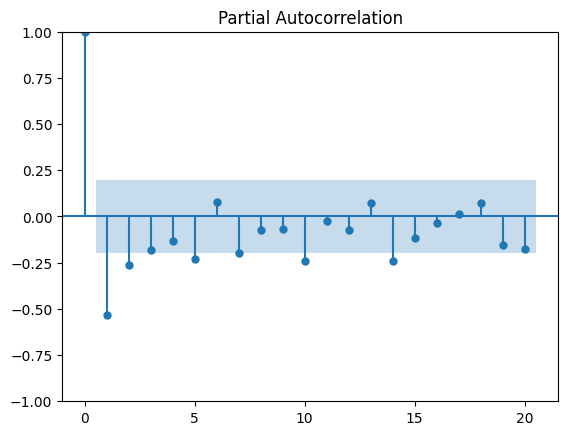

C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                revenue   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -712.510
Date:                Wed, 04 Dec 2024   AIC                           1431.021
Time:                        11:12:08   BIC                           1438.806
Sample:                    01-31-2022   HQIC                          1434.171
                         - 04-30-2030                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0881      0.101      0.873      0.383      -0.110       0.286
ma.L1         -0.9984      0.468     -2.134      0.033      -1.916      -0.081
sigma2      1.004e+05   5.19e+04      1.935      0.0

C:\Users\khali\AppData\Local\Temp\ipykernel_18436\2620344862.py:45: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(temp.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, label='Forecasted Revenue', color='red')


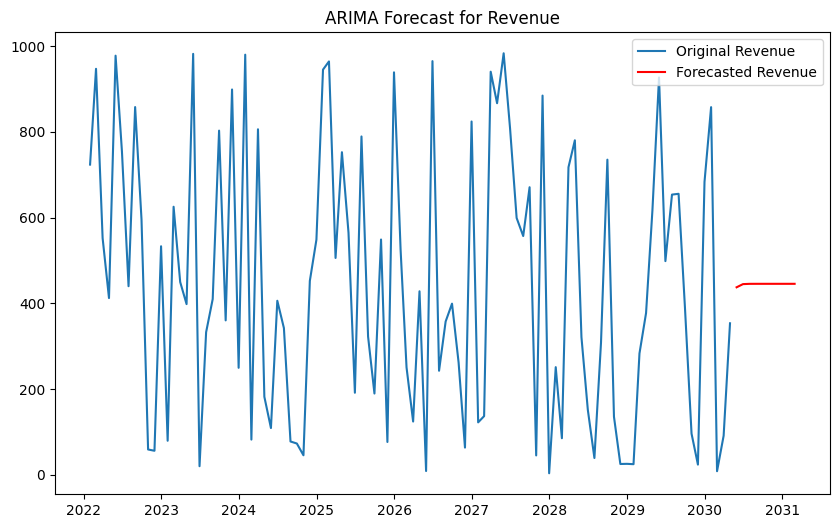

MAE: 294.0145969394383
RMSE: 318.60446816192797


In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Example DataFrame (replace with your actual DataFrame)
temp = pd.DataFrame({
    'Date': pd.date_range(start='2022-01-01', periods=100, freq='M'),
    'budget': np.random.rand(100) * 1000,  # Random budget data for illustration
    'revenue': np.random.rand(100) * 1000  # Random revenue data for illustration
})

# Set 'Date' as the index
temp.set_index('Date', inplace=True)

# Plot the original data
temp['revenue'].plot(figsize=(10, 6))
plt.title('Revenue Time Series')
plt.show()

# Differencing for stationarity
temp['revenue_diff'] = temp['revenue'] - temp['revenue'].shift(1)

# ACF and PACF plots
plot_acf(temp['revenue_diff'].dropna(), lags=20)
plot_pacf(temp['revenue_diff'].dropna(), lags=20)
plt.show()

# Fit ARIMA model (use parameters from ACF/PACF plots)
model = ARIMA(temp['revenue'], order=(1, 1, 1))  # ARIMA(1,1,1) as an example
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Forecast the next 10 periods
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(temp.index, temp['revenue'], label='Original Revenue')
plt.plot(pd.date_range(temp.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, label='Forecasted Revenue', color='red')
plt.legend()
plt.title('ARIMA Forecast for Revenue')
plt.show()

# Evaluate model (Example, replace with real values if available)
actual_revenue = np.random.rand(forecast_steps) * 1000  # Replace with real future values
mae = mean_absolute_error(actual_revenue, forecast)
rmse = np.sqrt(mean_squared_error(actual_revenue, forecast))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

In [ ]:
''' Data Setup:
Creates a DataFrame temp with columns budget and revenue and sets Date as the index.
Plotting the Time Series:

Plots the revenue data over time to visualize the trend.
Differencing the Data:

Applies differencing to make the revenue data stationary, which is required for ARIMA. This is done by subtracting the previous value from the current value (temp['revenue_diff']).
ACF and PACF Plots:

Plots ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) to help determine the values of AR (p), MA (q), and I (d) for the ARIMA model.
Fitting ARIMA:

Fits an ARIMA(1, 1, 1) model to the revenue data, based on the parameters selected from the ACF/PACF plots.
Forecasting:

Forecasts the next 10 periods (future revenue values) using the fitted ARIMA model and plots the forecast alongside the original data.
Model Evaluation:

Computes Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) between the forecasted values and actual future values (if available).
Summary:
This code prepares time series data (revenue), fits an ARIMA model, and forecasts future values. It also evaluates the forecast's accuracy using error metrics.
'''